# NewtonianVAE: Reacher2D Robot

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Import dependencies
import sys
import os

# Add root file system to path
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), "../")))

import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import torch

# Import project lib
from lib.training import Experiment
from lib.utils import load_encoder, load_pytorch_datasets, tc2np

# Notebook stuff
from ipywidgets import interact

# Enable TeX
rc("font", **{"size": 14, "family": "serif", "serif": ["Computer Modern"]})
rc("text", usetex=True)

# Set the torch device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


#### Set up the NewtonianVAE model experiment


In [3]:
# Specify the arguments of the experiment
model_name = "NewtonianVAE"
experiment_name = "Reacher2D"
dataset = "reacher_rand_10eps_100steps_.npz"

# Specify the model arguments
experiment_args = {
    "experiment": model_name + "-" + experiment_name,
    "embedder": model_name,
    "input_shape": [3, 64, 64],
    "agent": "VAEAgent",
    "state_dim": 2,
    "steps": 2,
    "divider": 2,
    "kl_reg": 1,  #'0.001:1.0:30:60',
    "epochs": 300,
    "batch_size": 1,
    "lr": 3e-4,
    "dataset": dataset,
    "action_dim": 2,
    "dt": 0.1,
    "rank": "diag",
}

#### Train the NewtonianVAE model


In [4]:
# Create an instance for this experiment
experiment = Experiment(experiment_args, train=True)


  warnings.warn('Lazy modules are a new feature under heavy development '




Model Description
 VAEAgent(
  (embedder): NewtonianVAE(
    (_encoder): Sequential(
      (0): HaConvNet(
        (seq): Sequential(
          (0): Conv2d(5, 16, kernel_size=(4, 4), stride=(2, 2))
          (1): ReLU()
          (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2))
          (3): ReLU()
          (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
          (5): ReLU()
          (6): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
          (7): ReLU()
          (8): Flatten(start_dim=1, end_dim=-1)
        )
      )
      (1): Linear(in_features=512, out_features=4, bias=True)
    )
    (_decoder): HaDeconvNet(
      (linear): Sequential(
        (0): Linear(in_features=2, out_features=512, bias=True)
      )
      (deconv_seq): Sequential(
        (0): ConvTranspose2d(512, 64, kernel_size=(5, 5), stride=(2, 2))
        (1): ReLU()
        (2): ConvTranspose2d(64, 32, kernel_size=(5, 5), stride=(2, 2))
        (3): ReLU()
        (4): ConvTranspose2d(32, 16, 

In [15]:
# Train the model
experiment.train()


Epoch 000	Rec: 899.5092	KL: 705.197315	 NELBO: 1604.7065
Epoch 010	Rec: 77.6614	KL: 2.401462	 NELBO: 80.06287298
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/thomas/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_4463/1833996200.py", line 2, in <cell line: 2>
    experiment.train()
  File "/home/thomas/Documents/nvae-project/lib/training.py", line 164, in train
    loss.backward()
  File "/home/thomas/.local/lib/python3.10/site-packages/torch/_tensor.py", line 396, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
  File "/home/thomas/.local/lib/python3.10/site-packages/torch/autograd/__init__.py", line 173, in backward
    Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/thomas/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.

#### Load the saved model

In [5]:
# Load the trained model parameters
experiment.load_model()


#### Visualise the latent space

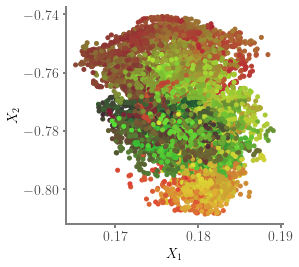

In [6]:
# Visualise the latent space
experiment.visualiseLatentSpace()


#### Decode a point in the latent space for interpretability

In [7]:
@interact(X1=(-2.5, 2.5), X2=(-1.0, 1.0))
def robotDreams(X1, X2):
    x = [X1, X2]
    z = np.array([x])
    decoded = experiment.model.embedder.decode(torch.Tensor(z).to(device))
    im = tc2np(decoded)[0].swapaxes(0, 2)
    plt.imshow(im)

interactive(children=(FloatSlider(value=0.0, description='X1', max=2.5, min=-2.5), FloatSlider(value=0.0, desc…